<a href="https://colab.research.google.com/github/Sunil-0507/AP22110011169/blob/main/Train_plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Seeding for reproducibility**

In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
!pip install kaggle

In [ ]:
!ls

drive  sample_data


In [ ]:
kaggle_credentails = json.load(open("/content/drive/MyDrive/plant disease detection/kaggle.json"))

In [ ]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [ ]:
!ls

drive  new-plant-diseases-dataset.zip  sample_data


In [ ]:
with ZipFile("/content/new-plant-diseases-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

**Plant disease prediction Training and validation Phase**

**Importing libraries**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Data Preprocessing**

**Training Image preprocessing**

In [ ]:
import tensorflow as tf

train_dir = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"

training_set = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,  # Use variable
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)

Found 70295 files belonging to 38 classes.


**Validation Image Preprocessing**

In [ ]:
import tensorflow as tf

# Define the correct path to the validation dataset
valid_dir = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"

# Load validation dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    directory=valid_dir,  # Corrected path usage
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)


Found 17572 files belonging to 38 classes.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
  print(x, x.shape)
  print(y, y.shape)
  break

tf.Tensor(
[[[[102.25  98.25 113.25]
   [108.75 104.75 119.75]
   [ 95.25  91.25 106.25]
   ...
   [154.   157.   176.  ]
   [149.   152.   171.  ]
   [151.75 154.75 173.75]]

  [[ 94.25  90.25 105.25]
   [104.5  100.5  115.5 ]
   [ 98.    94.   109.  ]
   ...
   [153.75 156.75 175.75]
   [151.5  154.5  173.5 ]
   [154.75 157.75 176.75]]

  [[ 96.75  92.75 107.75]
   [ 93.25  89.25 104.25]
   [ 77.25  73.25  88.25]
   ...
   [158.   161.   180.  ]
   [157.   160.   179.  ]
   [160.5  163.5  182.5 ]]

  ...

  [[ 79.75  74.75  94.75]
   [ 84.5   79.5   99.5 ]
   [ 80.5   75.5   95.5 ]
   ...
   [147.25 148.25 168.25]
   [147.5  148.5  168.5 ]
   [142.5  143.5  163.5 ]]

  [[ 86.    81.   101.  ]
   [ 74.75  69.75  89.75]
   [ 77.75  72.75  92.75]
   ...
   [140.75 141.75 161.75]
   [142.25 143.25 163.25]
   [139.75 140.75 160.75]]

  [[ 83.25  78.25  98.25]
   [ 89.    84.   104.  ]
   [ 97.75  92.75 112.75]
   ...
   [138.25 139.25 159.25]
   [134.75 135.75 155.75]
   [134.   135.   15


To avoid Overshooting Loss function

    1.Choose small learning rate default 0.001 here we have taken 0.0001
    2.There may be chance of underfitting so increase number of neuron
    3.Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature



**Building Model**

In [ ]:
cnn = tf.keras.models.Sequential()

**Building Convolution Layer**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

**Compiling and Training Phase**

In [ ]:
import tensorflow as tf

cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Remove 'legacy'
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=5)

Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 167s 70ms/step - accuracy: 0.3911 - loss: 2.1832 - val_accuracy: 0.8423 - val_loss: 0.5105
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 62ms/step - accuracy: 0.8311 - loss: 0.5364 - val_accuracy: 0.9082 - val_loss: 0.2813
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 62ms/step - accuracy: 0.9015 - loss: 0.3071 - val_accuracy: 0.9416 - val_loss: 0.1823
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 62ms/step - accuracy: 0.9306 - loss: 0.2138 - val_accuracy: 0.9310 - val_loss: 0.2184
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 62ms/step - accuracy: 0.9509 - loss: 0.1477 - val_accuracy: 0.9573 - val_loss: 0.1333


**Model Evaluation**

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 62s 28ms/step - accuracy: 0.9792 - loss: 0.0615
Training accuracy: 0.9818336963653564


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9593 - loss: 0.1335
Validation accuracy: 0.9573184847831726


**Saving Model**

In [ ]:
cnn.save('trained_plant_disease_model.keras')#/content/drive/MyDrive/Plant disease prediction/trained_plant_disease_model.keras

In [ ]:
import os

model_path = '/content/drive/MyDrive/Plant disease prediction/trained_plant_disease_model.keras'

if os.path.exists(model_path):
    size_bytes = os.path.getsize(model_path)
    size_mb = size_bytes / (1024 * 1024)
    print(f"Model file size: {size_mb:.2f} MB")
else:
    print("Model file not found.")


Model file size: 89.84 MB


In [ ]:
# Use functional API input definition
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

inputs = Input(shape=(128, 128, 3))  # <== Use `Input`, not `InputLayer`
x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
outputs = Dense(4, activation='softmax')(x)

cnn = Model(inputs, outputs)

# Compile and train the model as usual...
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# After training
cnn.save('trained_plant_disease_model.keras')


In [ ]:
cnn.save('trained_plant_disease_model.h5')


In [ ]:
from google.colab import files
files.download('trained_plant_disease_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.59236079454422,
  0.854655385017395,
  0.9109894037246704,
  0.9385305047035217,
  0.955018162727356],
 'loss': [1.3937807083129883,
  0.4600495994091034,
  0.27299684286117554,
  0.1892135590314865,
  0.13569514453411102],
 'val_accuracy': [0.8423059582710266,
  0.9082062244415283,
  0.9415547251701355,
  0.9310266375541687,
  0.9573184847831726],
 'val_loss': [0.5104859471321106,
  0.2813146710395813,
  0.18233513832092285,
  0.21836014091968536,
  0.13325679302215576]}

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
from google.colab import files

files.download('training_hist.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


**Accuracy Visualization**

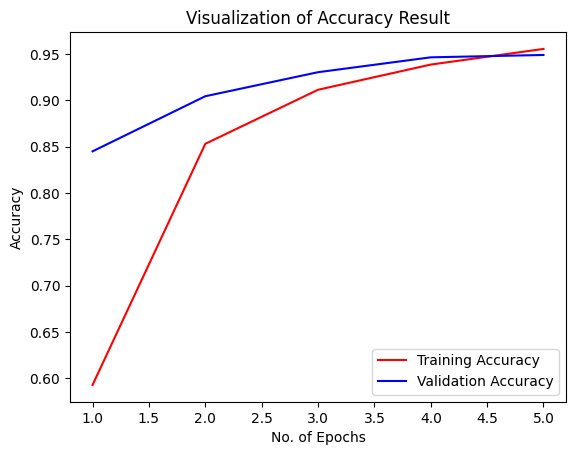

In [ ]:
import matplotlib.pyplot as plt

# Ensure epochs match the available data
epochs = list(range(1, len(training_history.history['accuracy']) + 1))

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')

plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


**Some other metrics for model evaluation**

In [ ]:
class_name = validation_set.class_names

In [ ]:
import tensorflow as tf

# Define the correct test dataset directory path
test_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,  # Corrected path
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False, # No shuffle for test set
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([3, 3, 3, ..., 3, 3, 3])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       504
                                 Apple___Black_rot       0.00      0.00      0.00       497
                          Apple___Cedar_apple_rust       0.00      0.00      0.00       440
                                   Apple___healthy       0.03      1.00      0.06       502
                               Blueberry___healthy       0.00      0.00      0.00       454
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       421
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       410
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Confusion Matrix Visualization**

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Replace with your actual dataset path
dataset_path = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"

# Get class names in sorted order
class_names = sorted(os.listdir(dataset_path))
print("Number of classes:", len(class_names))
print("Class Names:")
for i, name in enumerate(class_names):
    print(f"{i}: {name}")


Number of classes: 38
Class Names:
0: Apple___Apple_scab
1: Apple___Black_rot
2: Apple___Cedar_apple_rust
3: Apple___healthy
4: Blueberry___healthy
5: Cherry_(including_sour)___Powdery_mildew
6: Cherry_(including_sour)___healthy
7: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
8: Corn_(maize)___Common_rust_
9: Corn_(maize)___Northern_Leaf_Blight
10: Corn_(maize)___healthy
11: Grape___Black_rot
12: Grape___Esca_(Black_Measles)
13: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
14: Grape___healthy
15: Orange___Haunglongbing_(Citrus_greening)
16: Peach___Bacterial_spot
17: Peach___healthy
18: Pepper,_bell___Bacterial_spot
19: Pepper,_bell___healthy
20: Potato___Early_blight
21: Potato___Late_blight
22: Potato___healthy
23: Raspberry___healthy
24: Soybean___healthy
25: Squash___Powdery_mildew
26: Strawberry___Leaf_scorch
27: Strawberry___healthy
28: Tomato___Bacterial_spot
29: Tomato___Early_blight
30: Tomato___Late_blight
31: Tomato___Leaf_Mold
32: Tomato___Septoria_leaf_spot
33: Tomato_